# EDA on raw data (after collect)

This notebook main goal is to :
- Understand what is in the data : plot variables one by one, missing values, etc.
- See which data are correlated
- Removes useless variables : too much missing values, too correlated with other variables.
- See if data is biased on protected attributes

## Load packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Custom helper package : https://github.com/Nathanlauga/MLHelper
import MLHelper.analyse.eda as eda

In [2]:
PROJECT_PATH = '..'

## Load data informations

In [3]:
df_details = pd.read_csv(f'{PROJECT_PATH}/01_collect/columns_informations.csv')

In [4]:
df_details

,dataset,column,dtype,is_protected,new_name,description
0,adult,age,int64,1,NaN,Age of the person
1,adult,workclass,object,0,NaN,Workclass of the person (e.g. Private)
2,adult,fnlwgt,int64,0,final_weight,"final weight, which is the number of units in ..."
3,adult,education,object,0,NaN,Education level
4,adult,educational-num,int64,0,NaN,Education level (numerical format)
5,adult,marital-status,object,1,NaN,Marital status
6,adult,occupation,object,0,NaN,Field occupation
7,adult,relationship,object,0,NaN,Current relationship
8,adult,race,object,1,NaN,Ethnicity
9,adult,gender,object,1,NaN,Female or Male


## Load data using data informations

In [5]:
dfs = {}
datasets = df_details['dataset'].unique()

for dataset in datasets:
    dataset_detail = df_details[df_details['dataset'] == dataset]
    
    dtypes, columns = dataset_detail['dtype'], dataset_detail['column']
    dtypes = pd.Series(dtypes.values,index=columns).to_dict()
    
    dfs[dataset] = pd.read_csv(f'{PROJECT_PATH}/_data/{dataset}.csv',
                               dtype=dtypes
                              )
    
    columns = np.where(dataset_detail['new_name'].isna(), columns, dataset_detail['new_name'])
    dfs[dataset].columns = columns

## Display shape & head

In [6]:
for dataset in dfs:
    display(Markdown(f'#### {dataset}, {dfs[dataset].shape}'))
    display(dfs[dataset].head())

#### adult, (48842, 15)

,age,workclass,final_weight,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Set datasets into differents variables

Here we just have one dataset `adult`, but if in the next versions we had some others datasets it's important to set them into distinct variables. 

In [7]:
adult = dfs['adult']
del dfs

## Analyse : missing values

In [8]:
help(eda.print_missing_values)

Help on function print_missing_values in module MLHelper.analyse.eda.eda:

print_missing_values(df)
    Show a bar plot that display percentage of missing values on columns that have some.
    If no missing value then it use `display` & `Markdown` functions to indicate it.
    
    Parameters
    ----------
    df: pd.DataFrame
        Dataframe to inspect



In [9]:
display(Markdown('#### Missing values for adult dataset'))
eda.print_missing_values(adult)

#### Missing values for adult dataset

No missing value.

## Analyse : plot each variable

### Using autoviz

In [30]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Shape of your Data Set: (48842, 15)
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  6
    Number of String-Categorical Columns =  7
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    14 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set

################### Binary-Class VISUALIZATION Started #####################
Data Set Shape: 48842 rows, 15 cols

Data Set columns info:
* age: 0 nulls, 74 unique vals, most common: {36: 1348, 35: 1337}
* workclass: 0 nulls, 9 unique vals, most common: {'Private': 33906, 'Self-emp-not-inc': 3862}
* final_weight: 0

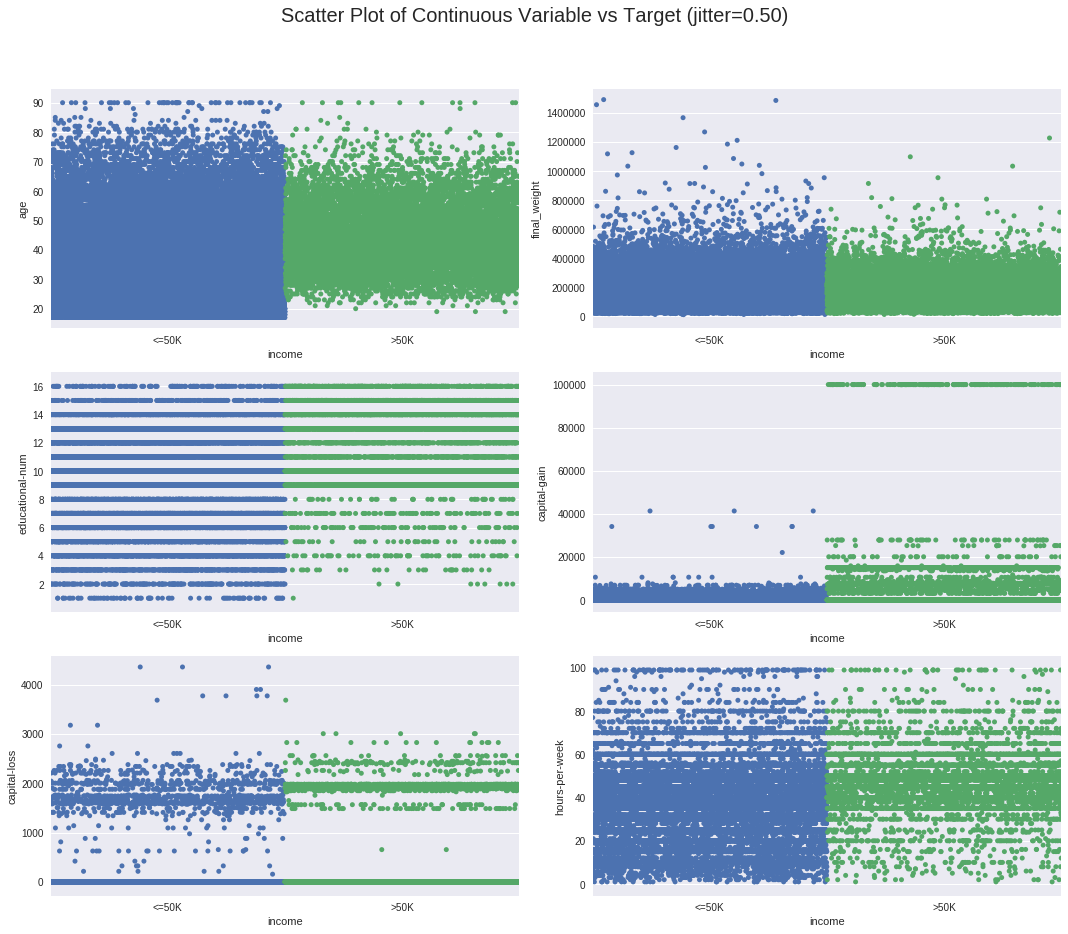

Total Number of Scatter Plots = 21


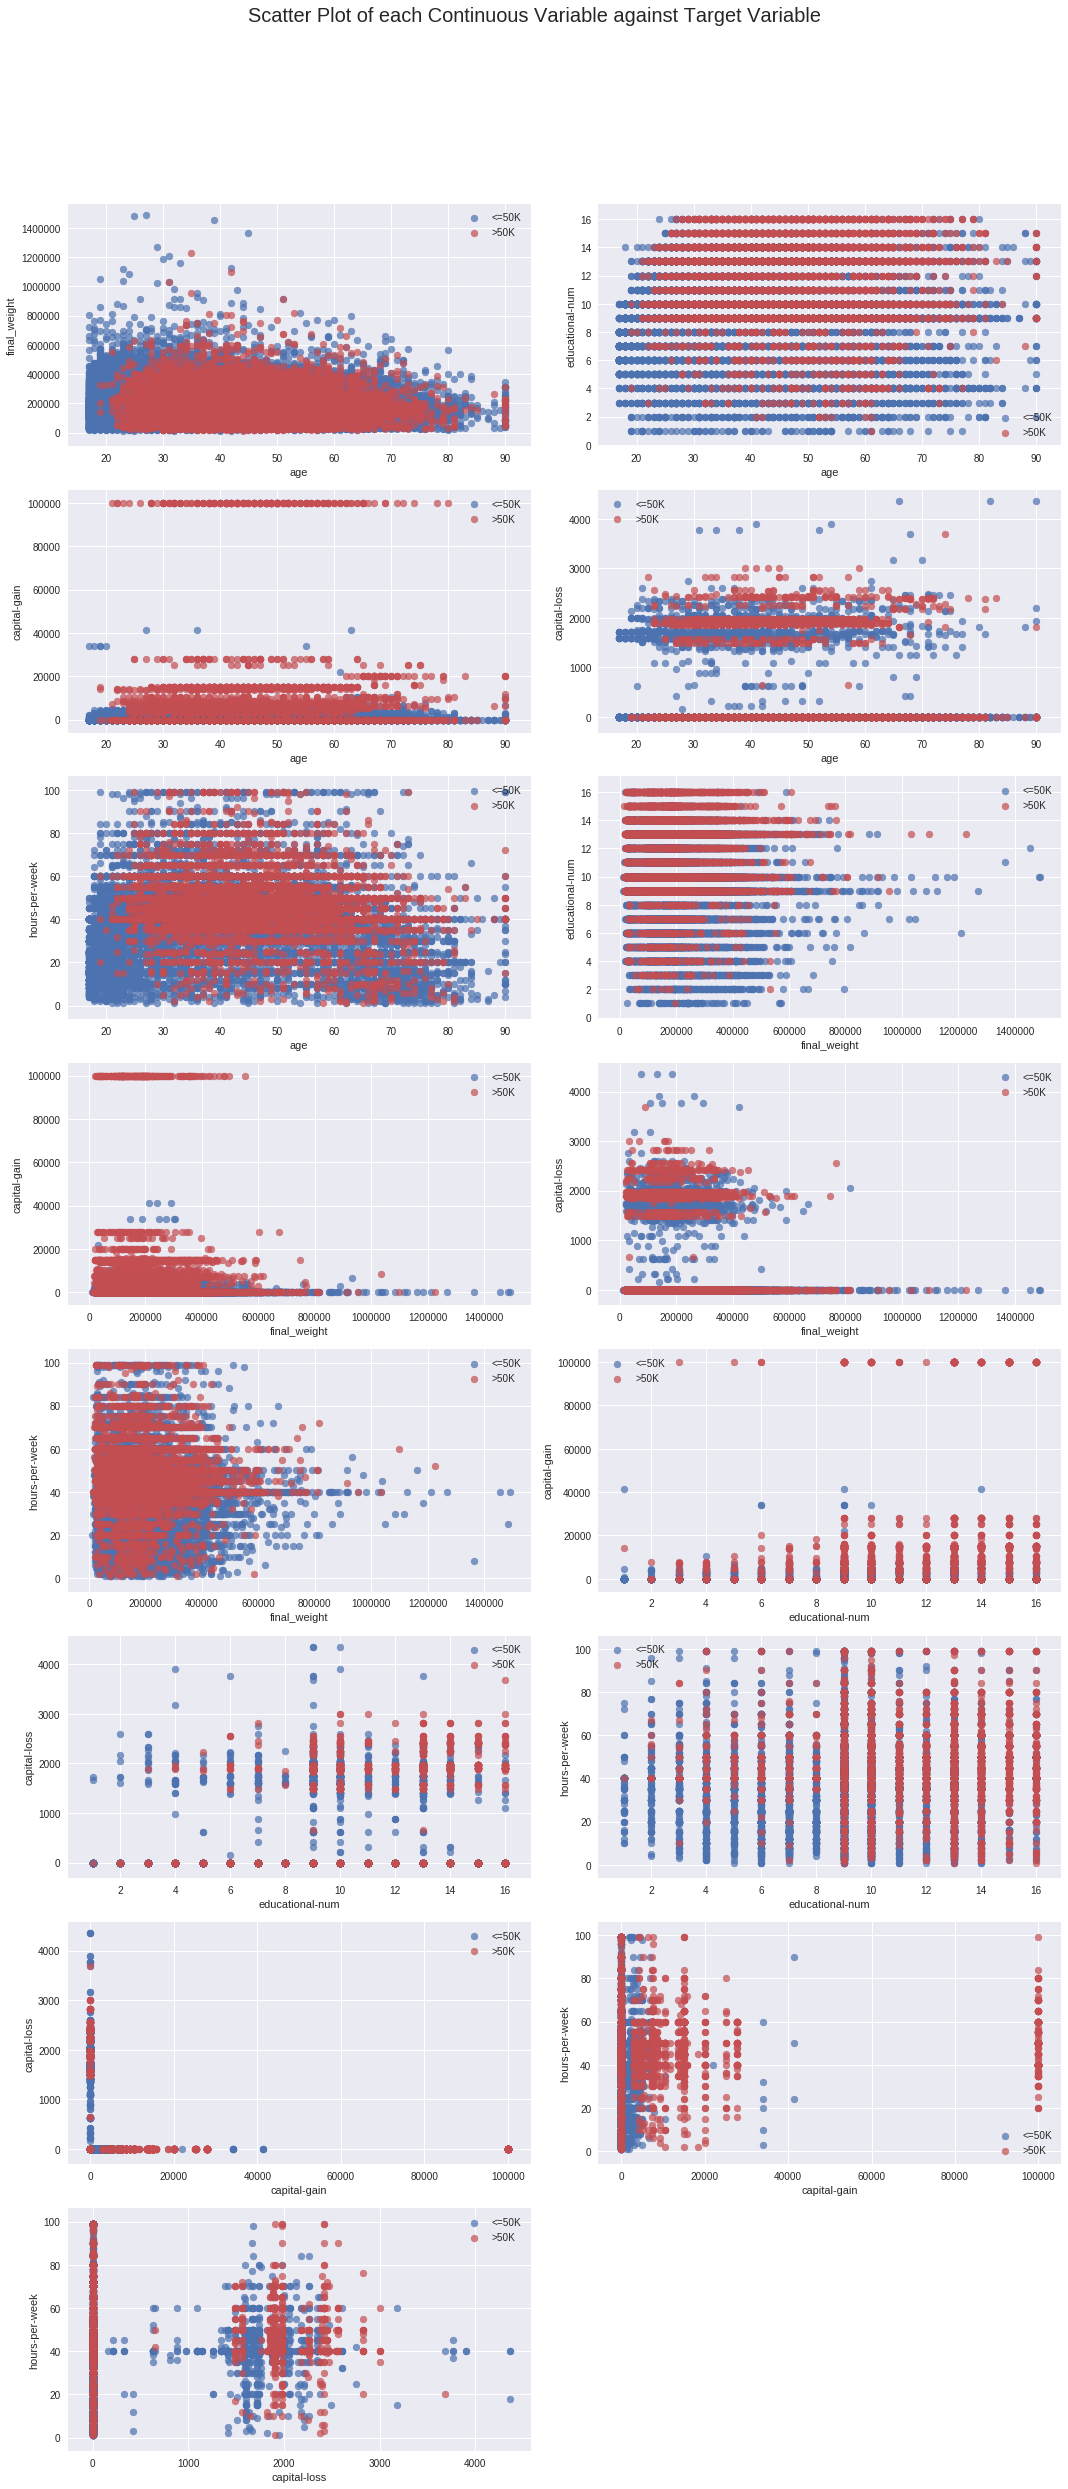

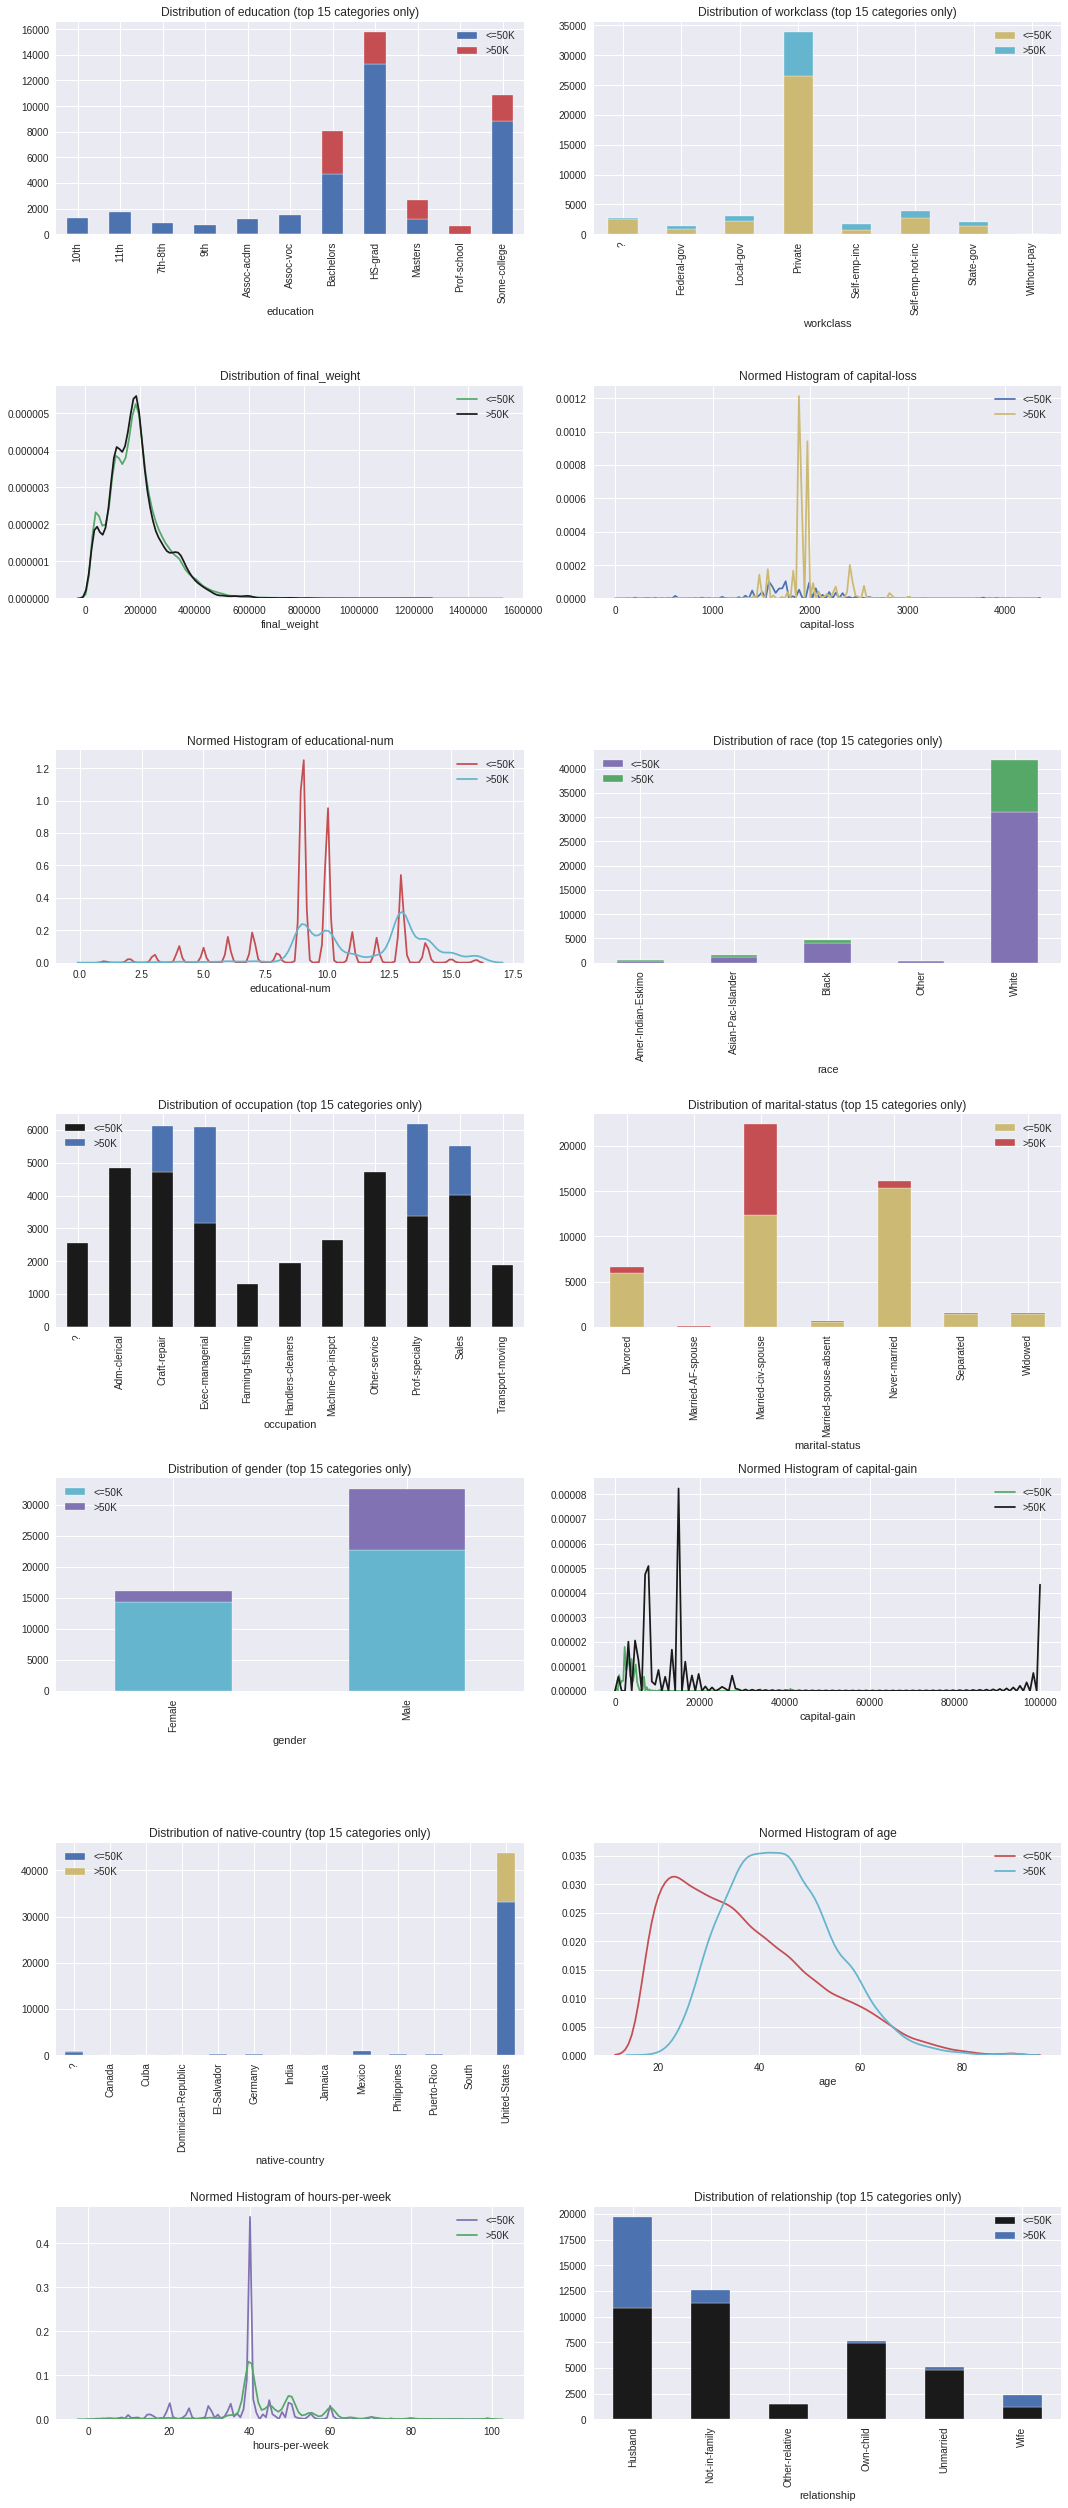

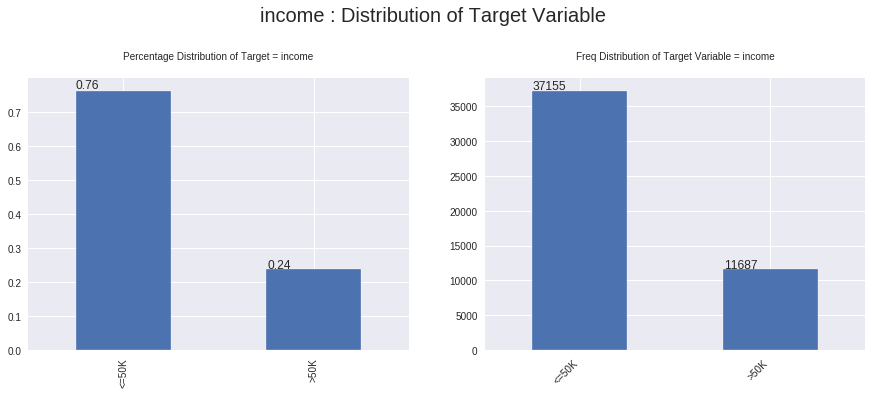

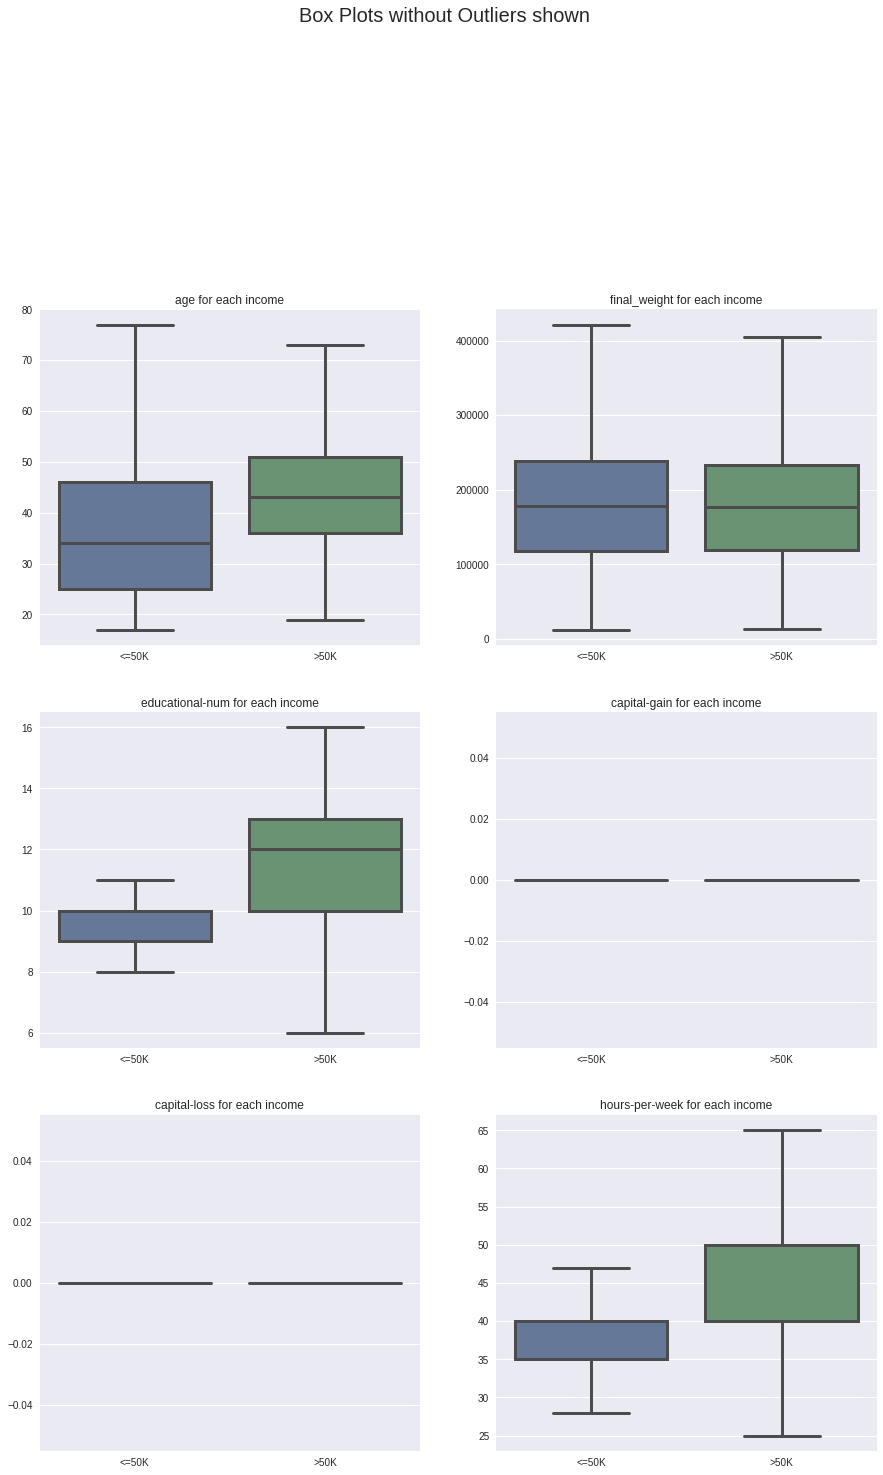

No date vars could be found in data set


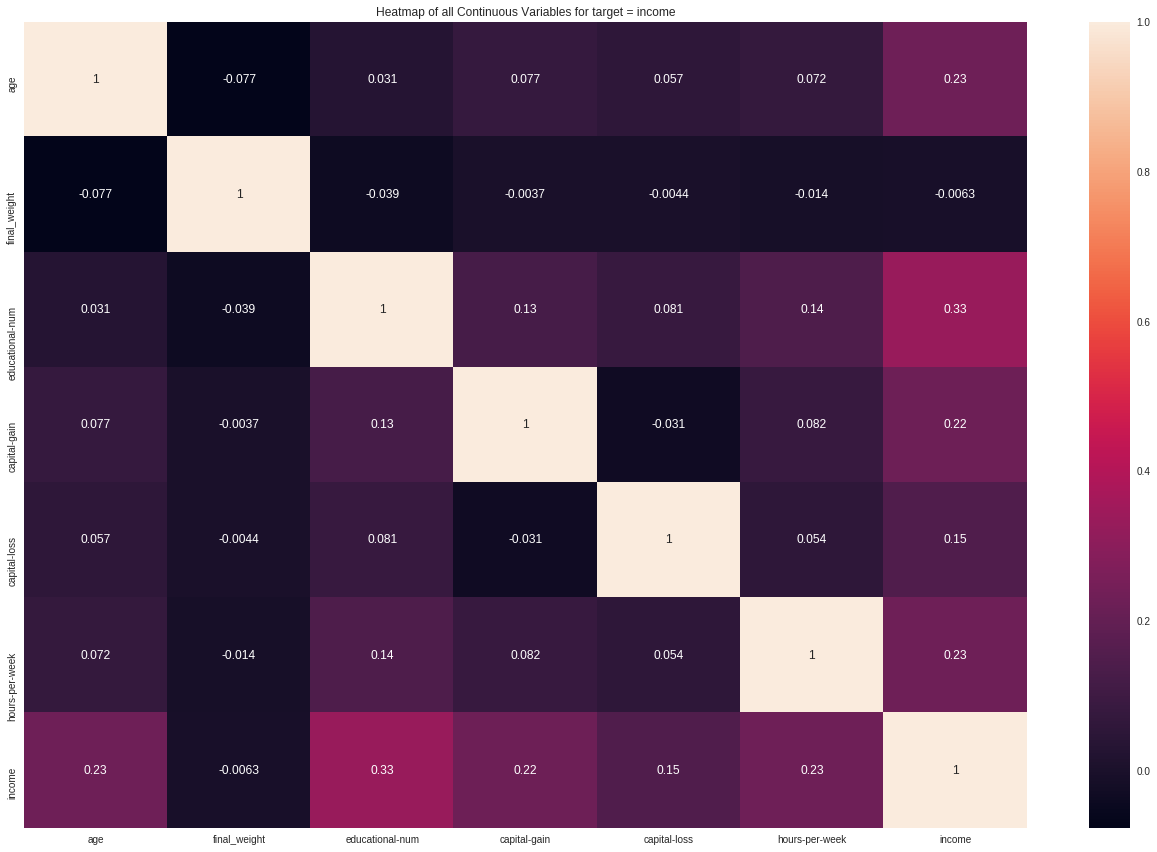

Number of Cat and Continuous Vars exceeds 30, hence no Pivot or Bar Charts
Time to run AutoViz (in seconds) = 26.694

 ###################### VISUALIZATION Completed ########################


In [34]:
filename = ""
sep = ","
dft = AV.AutoViz(
    filename,
    sep,
    'income',
    adult,
    header=0,
    verbose=1,
    lowess=True,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

In [15]:
help(eda.show_df_vars)

Help on function show_df_vars in module MLHelper.analyse.eda.eda:

show_df_vars(df, target=None)
    Show all variables with graphics to understand each variable.
    If target is set, complement visuals will be added to take a look on the
    influence that a variable can have on target
    
    Data type handle : categorical, numerical
    
    Parameters
    ----------
    df: pd.DataFrame
        Dataframe to inspect
    target: str (optional)
        Target column for classifier



### Numerical variables

*****

**age :** 0 nulls, 74 unique vals, most common: {36: 1348, 35: 1337}

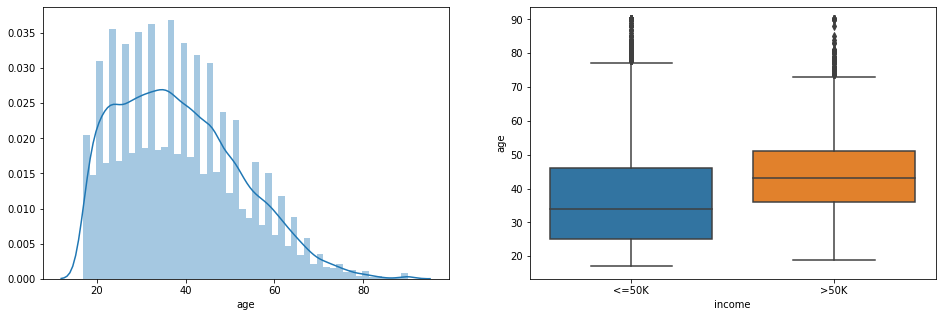

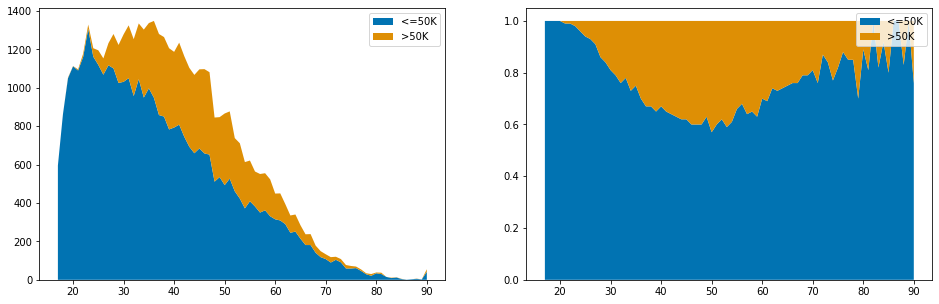

*****

**final_weight :** 0 nulls, 28523 unique vals, most common: {203488: 21, 190290: 19}

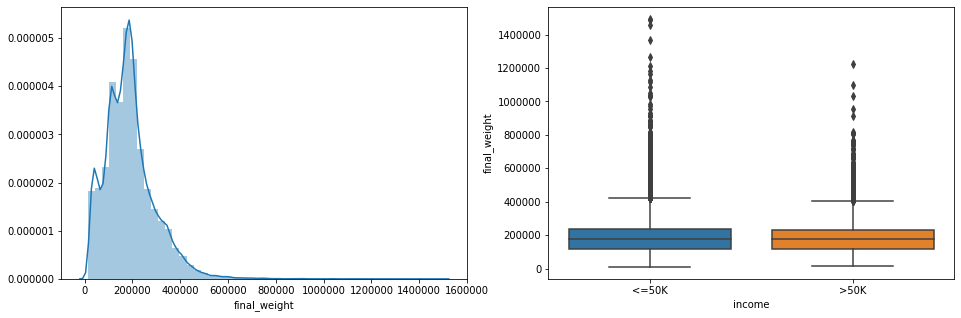

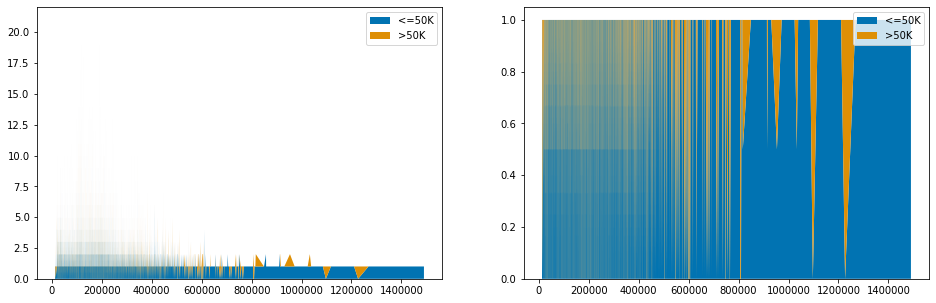

*****

**educational-num :** 0 nulls, 16 unique vals, most common: {9: 15784, 10: 10878}

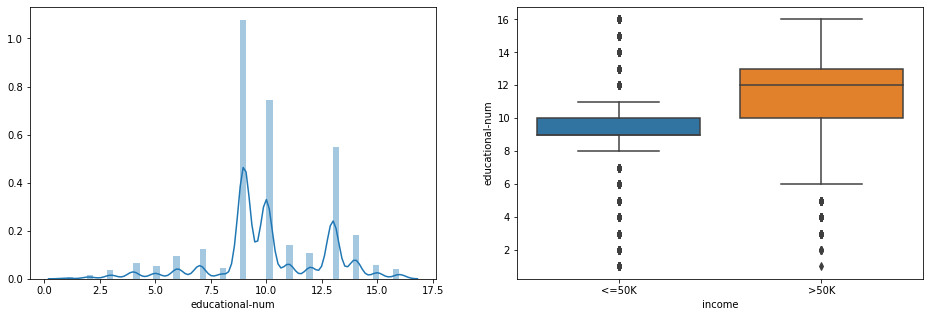

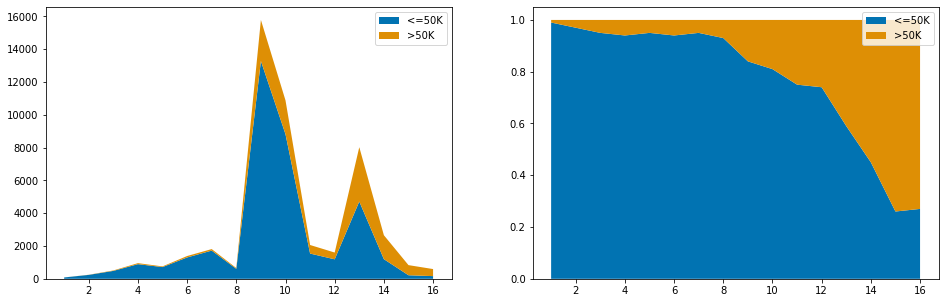

*****

**capital-gain :** 0 nulls, 123 unique vals, most common: {0: 44807, 15024: 513}

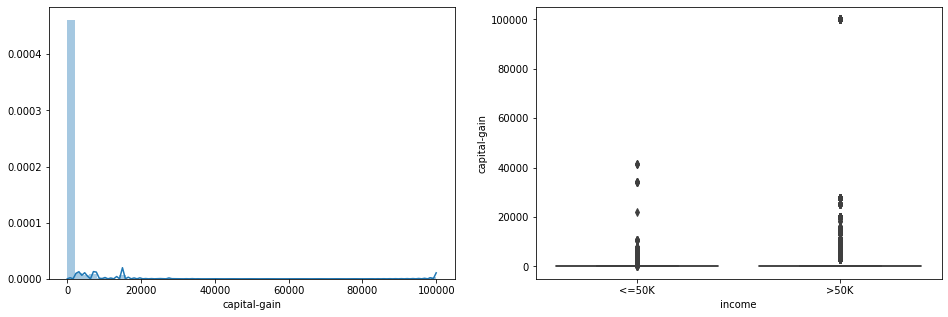

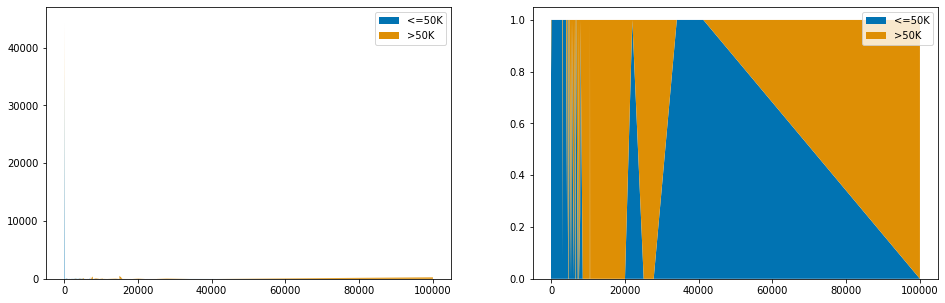

*****

**capital-loss :** 0 nulls, 99 unique vals, most common: {0: 46560, 1902: 304}

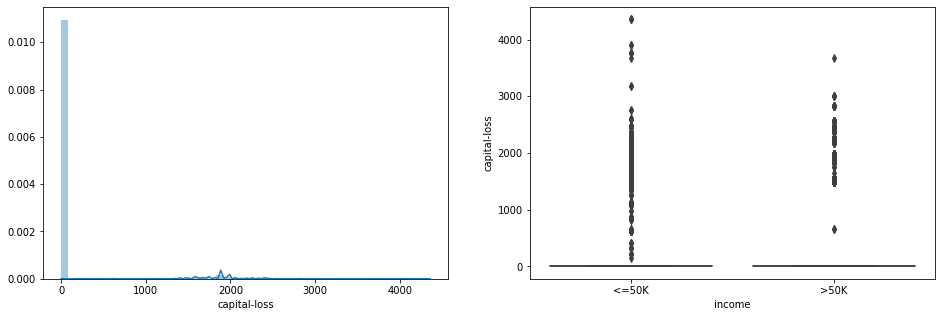

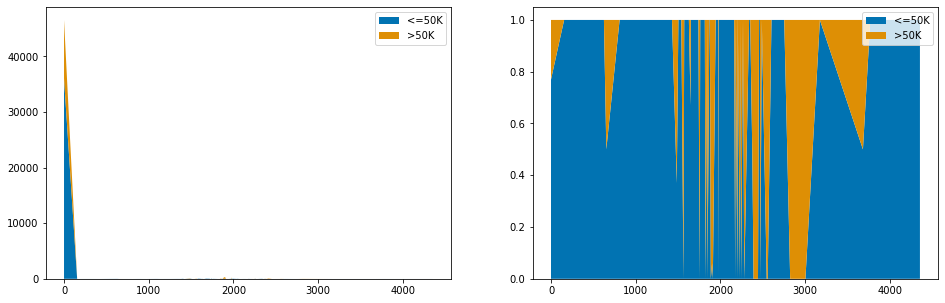

*****

**hours-per-week :** 0 nulls, 96 unique vals, most common: {40: 22803, 50: 4246}

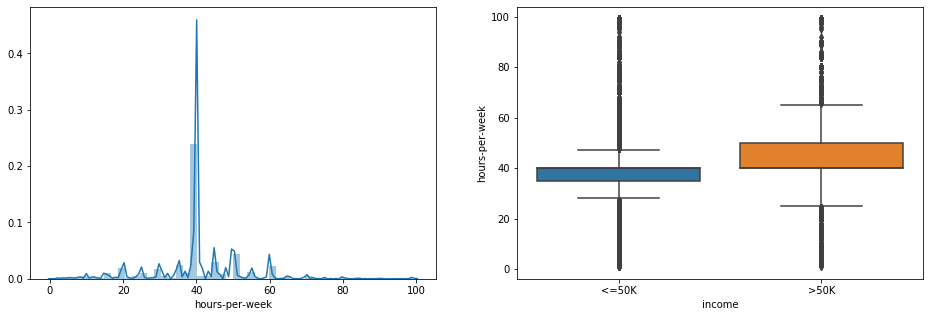

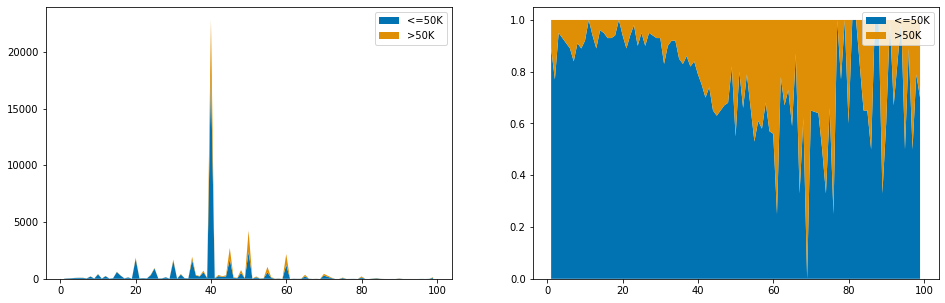

### Categorical variables

*****

**workclass :** 0 nulls, 9 unique vals, most common: {'Private': 33906, 'Self-emp-not-inc': 3862}

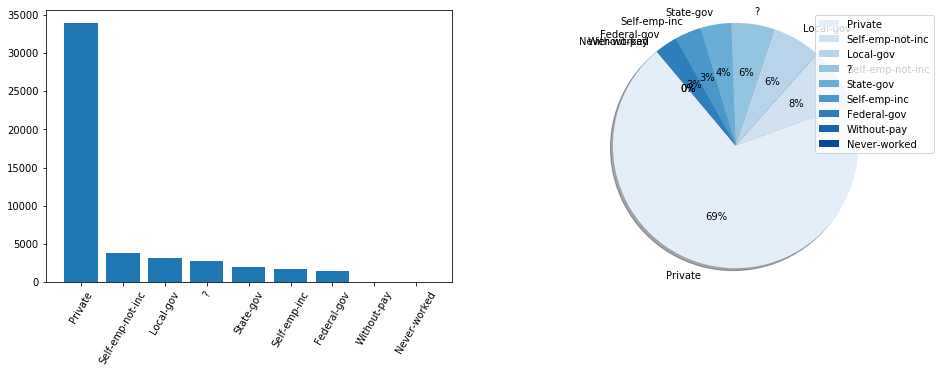

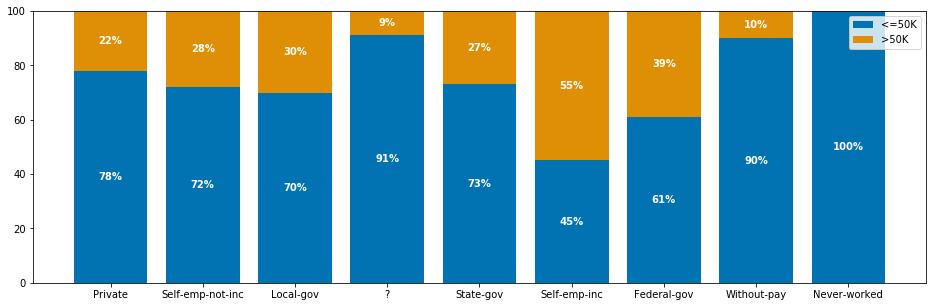

*****

**education :** 0 nulls, 16 unique vals, most common: {'HS-grad': 15784, 'Some-college': 10878}

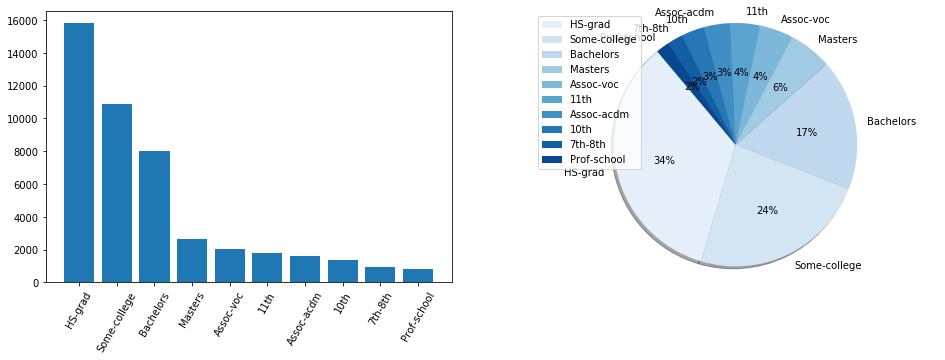

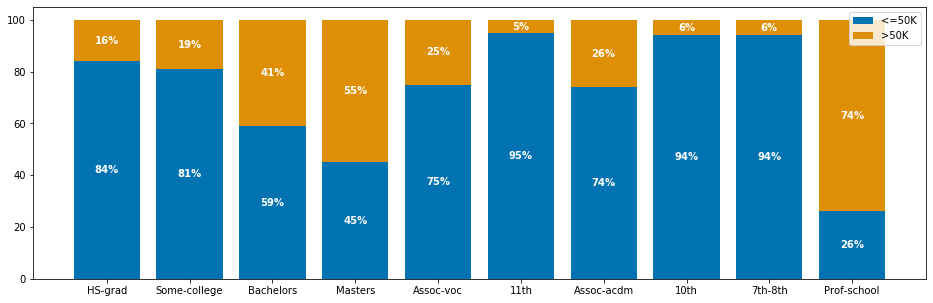

*****

**marital-status :** 0 nulls, 7 unique vals, most common: {'Married-civ-spouse': 22379, 'Never-married': 16117}

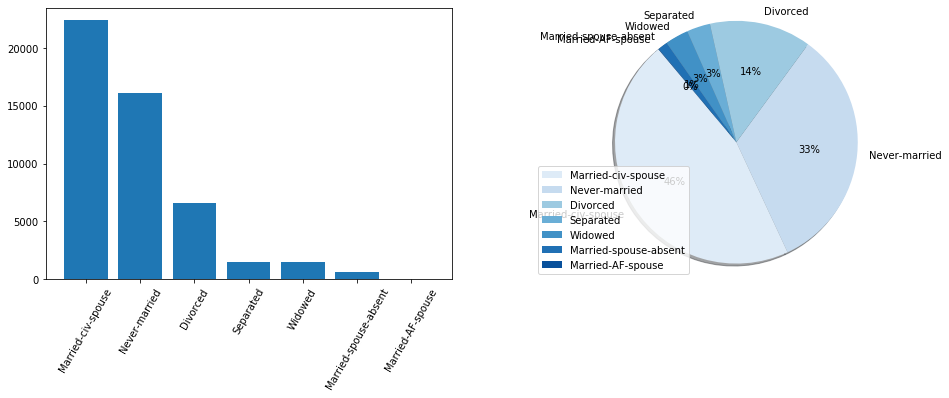

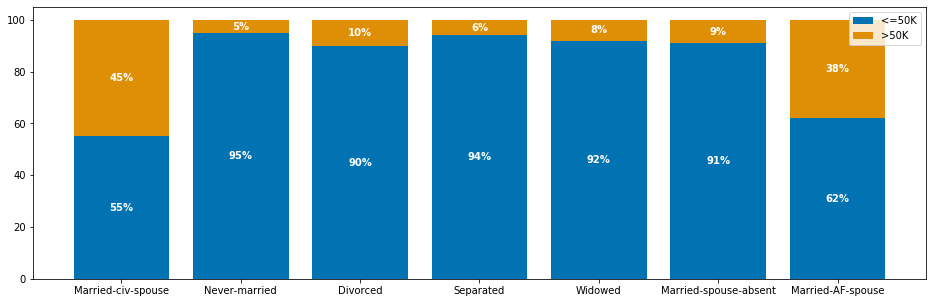

*****

**occupation :** 0 nulls, 15 unique vals, most common: {'Prof-specialty': 6172, 'Craft-repair': 6112}

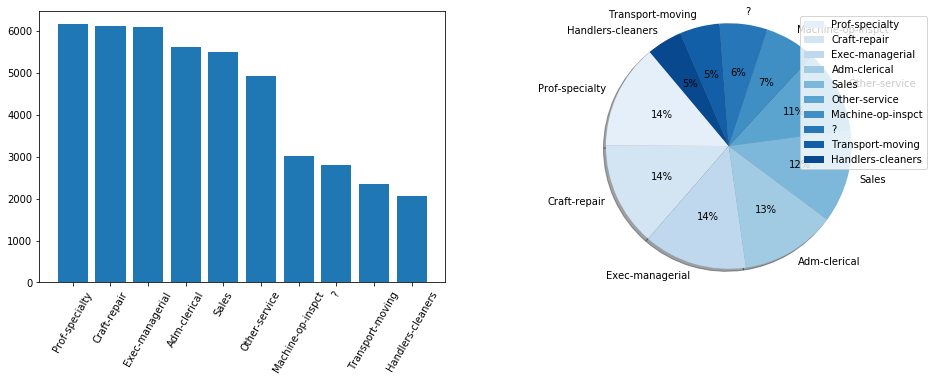

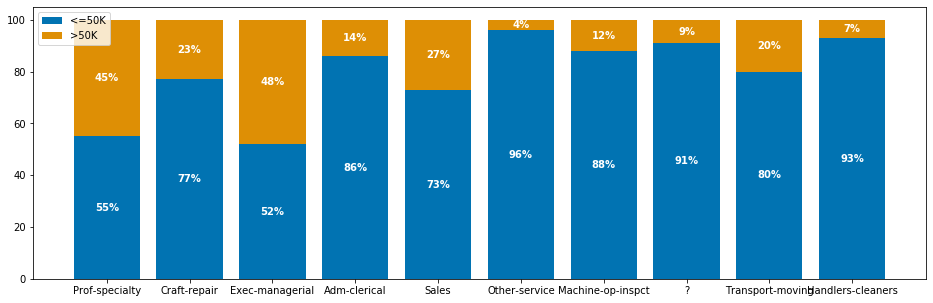

*****

**relationship :** 0 nulls, 6 unique vals, most common: {'Husband': 19716, 'Not-in-family': 12583}

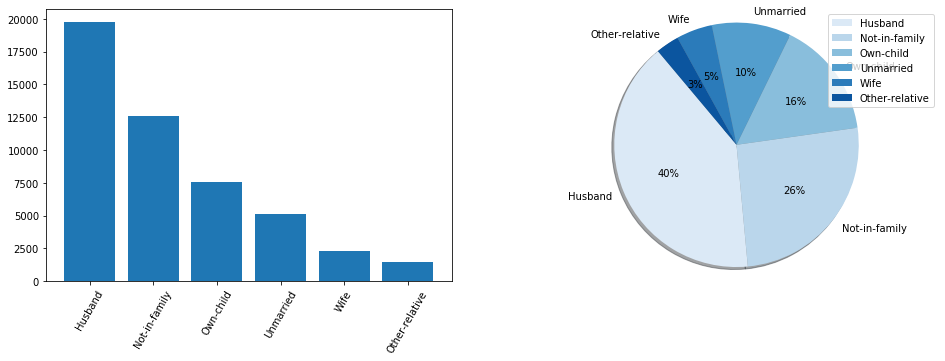

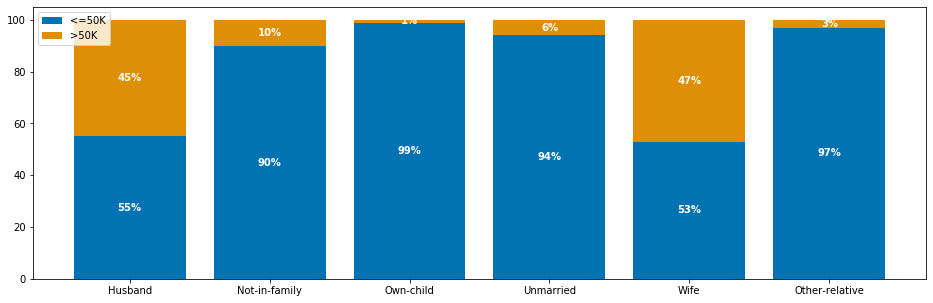

*****

**race :** 0 nulls, 5 unique vals, most common: {'White': 41762, 'Black': 4685}

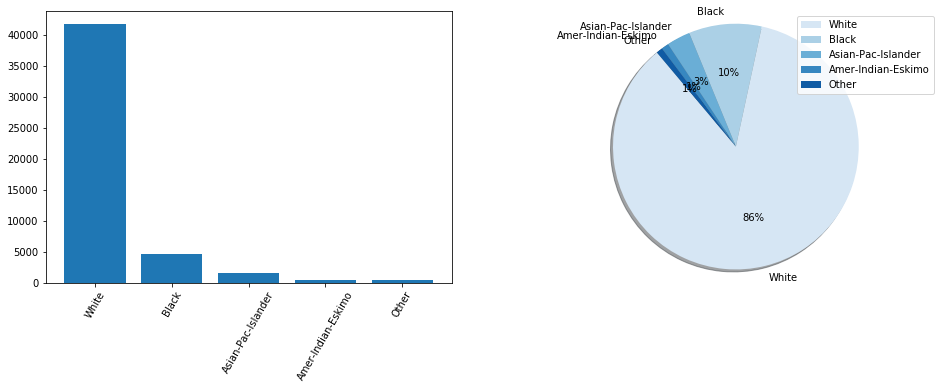

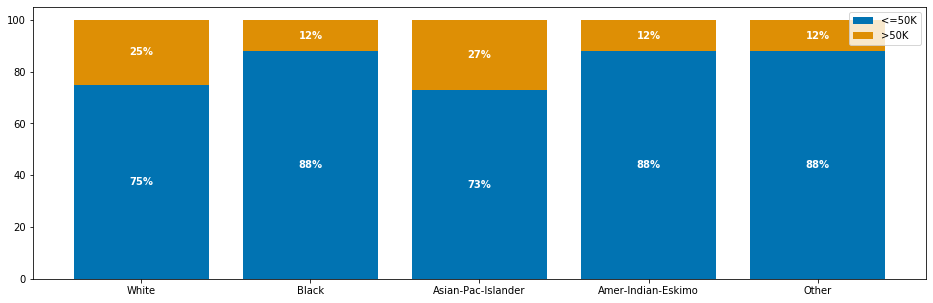

*****

**gender :** 0 nulls, 2 unique vals, most common: {'Male': 32650, 'Female': 16192}

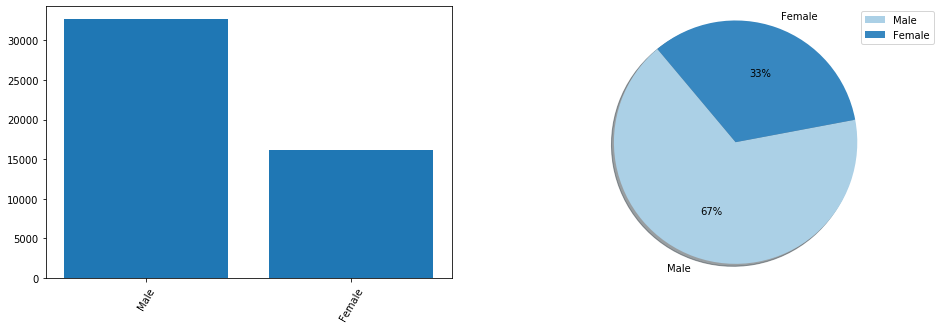

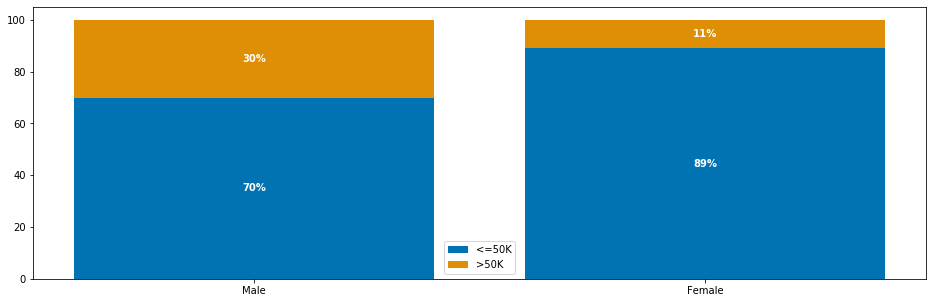

*****

**native-country :** 0 nulls, 42 unique vals, most common: {'United-States': 43832, 'Mexico': 951}

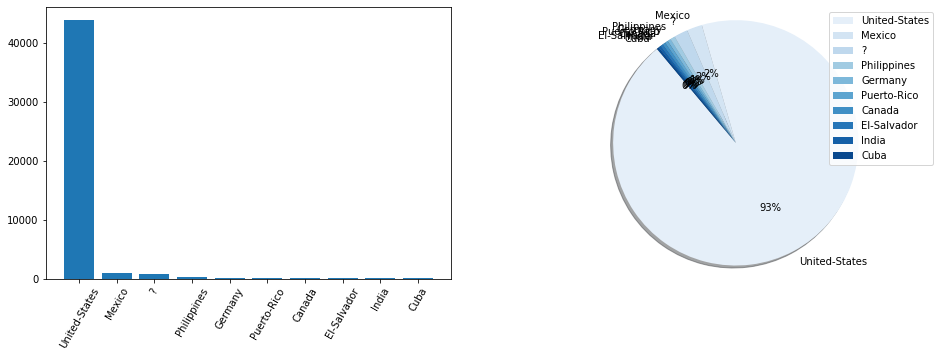

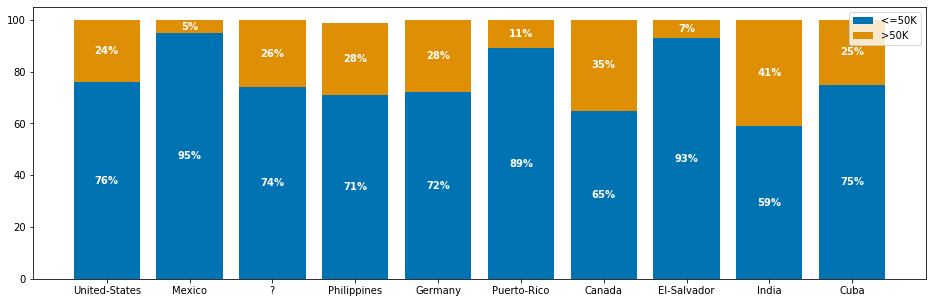

*****

**income :** 0 nulls, 2 unique vals, most common: {'<=50K': 37155, '>50K': 11687}

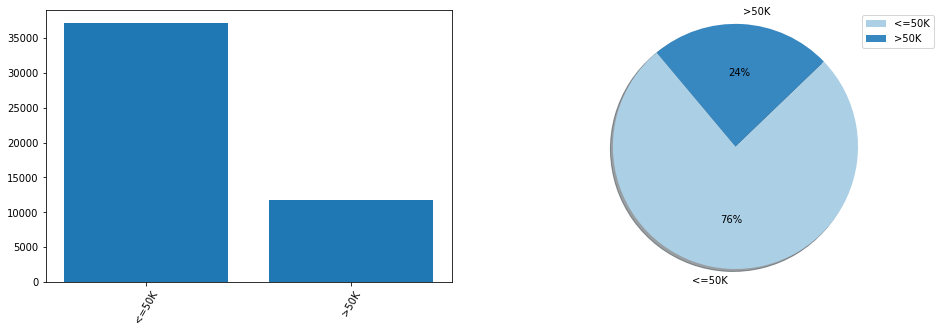

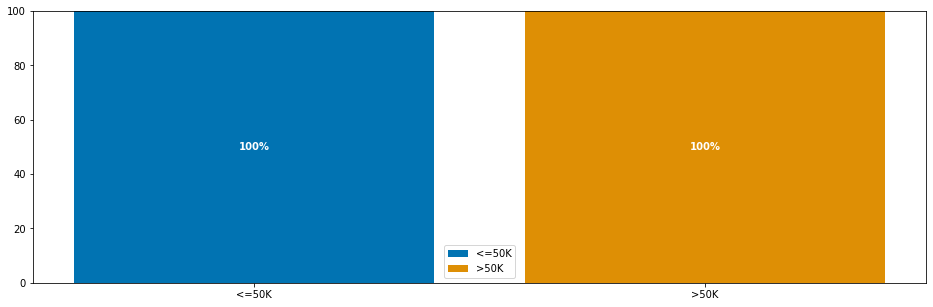

In [14]:
eda.show_df_vars(df=adult, target='income')